In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [72]:
#pip install xgboost

In [73]:
#pip install catboost

In [74]:
df=pd.read_csv("/home/yogesh/ml/CoverCast AI/data/raw/insurance2.csv")

In [75]:
df

,Unnamed: 0,age,bmi,children,expenses,log_expenses,expenses_capped,gender_male,smoker_yes,region_northwest,...,smoker_bmi,age.1,bmi.1,children.1,age^2,age bmi,age children,bmi^2,bmi children,children^2
0,0,0.021739,0.320755,0.0,16884.92,9.734235,16884.92,0.0,1.0,0.0,...,0.530418,0.021739,0.320755,0.0,0.009809,0.094578,0.000000,0.203779,0.000000,0.00
1,1,0.000000,0.479784,0.2,1725.55,7.453880,1725.55,1.0,0.0,0.0,...,0.000000,0.000000,0.479784,0.2,0.000000,0.125166,0.069231,0.345778,0.144444,0.04
2,2,0.217391,0.458221,0.6,4449.46,8.400763,4449.46,1.0,0.0,0.0,...,0.000000,0.217391,0.458221,0.6,0.121951,0.248457,0.323077,0.324932,0.423077,0.36
3,3,0.326087,0.180593,0.0,21984.47,9.998137,21984.47,1.0,0.0,1.0,...,0.000000,0.326087,0.180593,0.0,0.202810,0.180131,0.000000,0.101143,0.000000,0.00
4,4,0.304348,0.347709,0.0,3866.86,8.260457,3866.86,1.0,0.0,1.0,...,0.000000,0.304348,0.347709,0.0,0.185578,0.248769,0.000000,0.225935,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,1333,0.695652,0.404313,0.6,10600.55,9.268755,10600.55,1.0,0.0,1.0,...,0.000000,0.695652,0.404313,0.6,0.576882,0.493007,0.576923,0.275003,0.397436,0.36
1334,1334,0.000000,0.428571,0.0,2205.98,7.699380,2205.98,0.0,0.0,0.0,...,0.000000,0.000000,0.428571,0.0,0.000000,0.111806,0.000000,0.297085,0.000000,0.00
1335,1335,0.000000,0.563342,0.0,1629.83,7.396844,1629.83,0.0,0.0,0.0,...,0.000000,0.000000,0.563342,0.0,0.000000,0.146965,0.000000,0.431271,0.000000,0.00
1336,1336,0.065217,0.264151,0.0,2007.95,7.605367,2007.95,0.0,0.0,0.0,...,0.000000,0.065217,0.264151,0.0,0.031018,0.099148,0.000000,0.159790,0.000000,0.00


In [76]:
df

,Unnamed: 0,age,bmi,children,expenses,log_expenses,expenses_capped,gender_male,smoker_yes,region_northwest,...,smoker_bmi,age.1,bmi.1,children.1,age^2,age bmi,age children,bmi^2,bmi children,children^2
0,0,0.021739,0.320755,0.0,16884.92,9.734235,16884.92,0.0,1.0,0.0,...,0.530418,0.021739,0.320755,0.0,0.009809,0.094578,0.000000,0.203779,0.000000,0.00
1,1,0.000000,0.479784,0.2,1725.55,7.453880,1725.55,1.0,0.0,0.0,...,0.000000,0.000000,0.479784,0.2,0.000000,0.125166,0.069231,0.345778,0.144444,0.04
2,2,0.217391,0.458221,0.6,4449.46,8.400763,4449.46,1.0,0.0,0.0,...,0.000000,0.217391,0.458221,0.6,0.121951,0.248457,0.323077,0.324932,0.423077,0.36
3,3,0.326087,0.180593,0.0,21984.47,9.998137,21984.47,1.0,0.0,1.0,...,0.000000,0.326087,0.180593,0.0,0.202810,0.180131,0.000000,0.101143,0.000000,0.00
4,4,0.304348,0.347709,0.0,3866.86,8.260457,3866.86,1.0,0.0,1.0,...,0.000000,0.304348,0.347709,0.0,0.185578,0.248769,0.000000,0.225935,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,1333,0.695652,0.404313,0.6,10600.55,9.268755,10600.55,1.0,0.0,1.0,...,0.000000,0.695652,0.404313,0.6,0.576882,0.493007,0.576923,0.275003,0.397436,0.36
1334,1334,0.000000,0.428571,0.0,2205.98,7.699380,2205.98,0.0,0.0,0.0,...,0.000000,0.000000,0.428571,0.0,0.000000,0.111806,0.000000,0.297085,0.000000,0.00
1335,1335,0.000000,0.563342,0.0,1629.83,7.396844,1629.83,0.0,0.0,0.0,...,0.000000,0.000000,0.563342,0.0,0.000000,0.146965,0.000000,0.431271,0.000000,0.00
1336,1336,0.065217,0.264151,0.0,2007.95,7.605367,2007.95,0.0,0.0,0.0,...,0.000000,0.065217,0.264151,0.0,0.031018,0.099148,0.000000,0.159790,0.000000,0.00


In [78]:
df.drop(columns='Unnamed: 0',axis=1, inplace=True)


In [79]:
df

,age,bmi,children,expenses,log_expenses,expenses_capped,gender_male,smoker_yes,region_northwest,region_southeast,...,smoker_bmi,age.1,bmi.1,children.1,age^2,age bmi,age children,bmi^2,bmi children,children^2
0,0.021739,0.320755,0.0,16884.92,9.734235,16884.92,0.0,1.0,0.0,0.0,...,0.530418,0.021739,0.320755,0.0,0.009809,0.094578,0.000000,0.203779,0.000000,0.00
1,0.000000,0.479784,0.2,1725.55,7.453880,1725.55,1.0,0.0,0.0,1.0,...,0.000000,0.000000,0.479784,0.2,0.000000,0.125166,0.069231,0.345778,0.144444,0.04
2,0.217391,0.458221,0.6,4449.46,8.400763,4449.46,1.0,0.0,0.0,1.0,...,0.000000,0.217391,0.458221,0.6,0.121951,0.248457,0.323077,0.324932,0.423077,0.36
3,0.326087,0.180593,0.0,21984.47,9.998137,21984.47,1.0,0.0,1.0,0.0,...,0.000000,0.326087,0.180593,0.0,0.202810,0.180131,0.000000,0.101143,0.000000,0.00
4,0.304348,0.347709,0.0,3866.86,8.260457,3866.86,1.0,0.0,1.0,0.0,...,0.000000,0.304348,0.347709,0.0,0.185578,0.248769,0.000000,0.225935,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.404313,0.6,10600.55,9.268755,10600.55,1.0,0.0,1.0,0.0,...,0.000000,0.695652,0.404313,0.6,0.576882,0.493007,0.576923,0.275003,0.397436,0.36
1334,0.000000,0.428571,0.0,2205.98,7.699380,2205.98,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.428571,0.0,0.000000,0.111806,0.000000,0.297085,0.000000,0.00
1335,0.000000,0.563342,0.0,1629.83,7.396844,1629.83,0.0,0.0,0.0,1.0,...,0.000000,0.000000,0.563342,0.0,0.000000,0.146965,0.000000,0.431271,0.000000,0.00
1336,0.065217,0.264151,0.0,2007.95,7.605367,2007.95,0.0,0.0,0.0,0.0,...,0.000000,0.065217,0.264151,0.0,0.031018,0.099148,0.000000,0.159790,0.000000,0.00


In [80]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Features & Target
X = df.drop("expenses", axis=1)
y = df["expenses"]




In [81]:
X

,age,bmi,children,log_expenses,expenses_capped,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest,...,smoker_bmi,age.1,bmi.1,children.1,age^2,age bmi,age children,bmi^2,bmi children,children^2
0,0.021739,0.320755,0.0,9.734235,16884.92,0.0,1.0,0.0,0.0,1.0,...,0.530418,0.021739,0.320755,0.0,0.009809,0.094578,0.000000,0.203779,0.000000,0.00
1,0.000000,0.479784,0.2,7.453880,1725.55,1.0,0.0,0.0,1.0,0.0,...,0.000000,0.000000,0.479784,0.2,0.000000,0.125166,0.069231,0.345778,0.144444,0.04
2,0.217391,0.458221,0.6,8.400763,4449.46,1.0,0.0,0.0,1.0,0.0,...,0.000000,0.217391,0.458221,0.6,0.121951,0.248457,0.323077,0.324932,0.423077,0.36
3,0.326087,0.180593,0.0,9.998137,21984.47,1.0,0.0,1.0,0.0,0.0,...,0.000000,0.326087,0.180593,0.0,0.202810,0.180131,0.000000,0.101143,0.000000,0.00
4,0.304348,0.347709,0.0,8.260457,3866.86,1.0,0.0,1.0,0.0,0.0,...,0.000000,0.304348,0.347709,0.0,0.185578,0.248769,0.000000,0.225935,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.404313,0.6,9.268755,10600.55,1.0,0.0,1.0,0.0,0.0,...,0.000000,0.695652,0.404313,0.6,0.576882,0.493007,0.576923,0.275003,0.397436,0.36
1334,0.000000,0.428571,0.0,7.699380,2205.98,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.428571,0.0,0.000000,0.111806,0.000000,0.297085,0.000000,0.00
1335,0.000000,0.563342,0.0,7.396844,1629.83,0.0,0.0,0.0,1.0,0.0,...,0.000000,0.000000,0.563342,0.0,0.000000,0.146965,0.000000,0.431271,0.000000,0.00
1336,0.065217,0.264151,0.0,7.605367,2007.95,0.0,0.0,0.0,0.0,1.0,...,0.000000,0.065217,0.264151,0.0,0.031018,0.099148,0.000000,0.159790,0.000000,0.00


#### Preparing X and Y variables

In [82]:
X = df.drop(columns=['expenses'],axis=1)

In [83]:
y= df.expenses

In [84]:
X.shape

(1338, 21)

In [86]:
X.shape

(1338, 21)

In [87]:
X

,age,bmi,children,log_expenses,expenses_capped,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest,...,smoker_bmi,age.1,bmi.1,children.1,age^2,age bmi,age children,bmi^2,bmi children,children^2
0,0.021739,0.320755,0.0,9.734235,16884.92,0.0,1.0,0.0,0.0,1.0,...,0.530418,0.021739,0.320755,0.0,0.009809,0.094578,0.000000,0.203779,0.000000,0.00
1,0.000000,0.479784,0.2,7.453880,1725.55,1.0,0.0,0.0,1.0,0.0,...,0.000000,0.000000,0.479784,0.2,0.000000,0.125166,0.069231,0.345778,0.144444,0.04
2,0.217391,0.458221,0.6,8.400763,4449.46,1.0,0.0,0.0,1.0,0.0,...,0.000000,0.217391,0.458221,0.6,0.121951,0.248457,0.323077,0.324932,0.423077,0.36
3,0.326087,0.180593,0.0,9.998137,21984.47,1.0,0.0,1.0,0.0,0.0,...,0.000000,0.326087,0.180593,0.0,0.202810,0.180131,0.000000,0.101143,0.000000,0.00
4,0.304348,0.347709,0.0,8.260457,3866.86,1.0,0.0,1.0,0.0,0.0,...,0.000000,0.304348,0.347709,0.0,0.185578,0.248769,0.000000,0.225935,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.404313,0.6,9.268755,10600.55,1.0,0.0,1.0,0.0,0.0,...,0.000000,0.695652,0.404313,0.6,0.576882,0.493007,0.576923,0.275003,0.397436,0.36
1334,0.000000,0.428571,0.0,7.699380,2205.98,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.428571,0.0,0.000000,0.111806,0.000000,0.297085,0.000000,0.00
1335,0.000000,0.563342,0.0,7.396844,1629.83,0.0,0.0,0.0,1.0,0.0,...,0.000000,0.000000,0.563342,0.0,0.000000,0.146965,0.000000,0.431271,0.000000,0.00
1336,0.065217,0.264151,0.0,7.605367,2007.95,0.0,0.0,0.0,0.0,1.0,...,0.000000,0.065217,0.264151,0.0,0.031018,0.099148,0.000000,0.159790,0.000000,0.00


In [88]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [89]:
X_scaled

array([[0.02173913, 0.32075472, 0.        , ..., 0.20377905, 0.        ,
        0.        ],
       [0.        , 0.47978437, 0.2       , ..., 0.34577802, 0.14444444,
        0.04      ],
       [0.2173913 , 0.45822102, 0.6       , ..., 0.32493242, 0.42307692,
        0.36      ],
       ...,
       [0.        , 0.56334232, 0.        , ..., 0.43127075, 0.        ,
        0.        ],
       [0.06521739, 0.26415094, 0.        , ..., 0.1597903 , 0.        ,
        0.        ],
       [0.93478261, 0.35309973, 0.        , ..., 0.23046017, 0.        ,
        0.        ]])

In [90]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((1070, 21), (268, 21))

#### Create an Evaluate Function to give all metrics after model Training

In [91]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

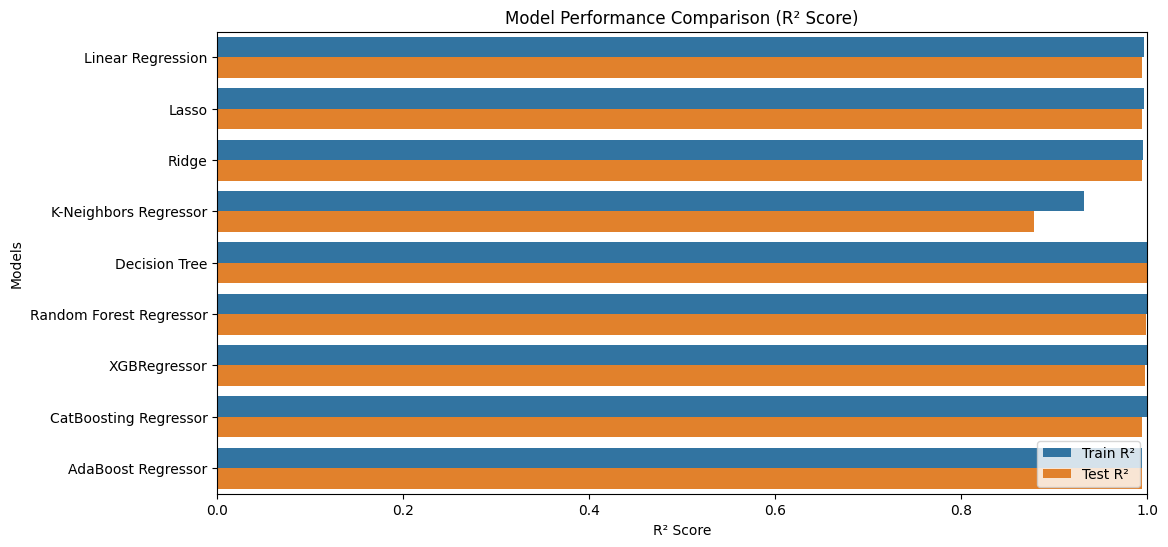


Best Model: Decision Tree with R² = 0.9999


In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_names = []
train_r2_scores = []
test_r2_scores = []

for name, model in models.items():
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate
    _, _, train_r2 = evaluate_model(y_train, y_train_pred)
    _, _, test_r2 = evaluate_model(y_test, y_test_pred)

    model_names.append(name)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

# Create DataFrame for plotting
results_df = pd.DataFrame({
    "Model": model_names,
    "Train R²": train_r2_scores,
    "Test R²": test_r2_scores
})

# Bar Plot for Train vs Test R²
plt.figure(figsize=(12, 6))
results_df_melted = results_df.melt(id_vars="Model", value_vars=["Train R²", "Test R²"], var_name="Dataset", value_name="R² Score")
sns.barplot(data=results_df_melted, x="R² Score", y="Model", hue="Dataset")
plt.title("Model Performance Comparison (R² Score)")
plt.xlabel("R² Score")
plt.ylabel("Models")
plt.xlim(0, 1)  # optional, since R² ranges from 0–1
plt.legend(loc="lower right")
plt.show()

# Highlight Best Model
best_model_index = results_df["Test R²"].idxmax()
print(f"\nBest Model: {results_df.loc[best_model_index, 'Model']} with R² = {results_df.loc[best_model_index, 'Test R²']:.4f}")


#### Results

In [95]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
4,Decision Tree,0.999604
5,Random Forest Regressor,0.998952
6,XGBRegressor,0.997652
7,CatBoosting Regressor,0.994764
1,Lasso,0.994604
0,Linear Regression,0.994437
8,AdaBoost Regressor,0.994435
2,Ridge,0.994122
3,K-Neighbors Regressor,0.878229


In [96]:
cat_model = CatBoostRegressor()
cat_model = cat_model.fit(X_train, y_train)
y_pred = cat_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)


Learning rate set to 0.041383
0:	learn: 11584.8684676	total: 1.18ms	remaining: 1.17s
1:	learn: 11150.1959805	total: 2.13ms	remaining: 1.06s
2:	learn: 10749.7779956	total: 3.02ms	remaining: 1s
3:	learn: 10375.7335355	total: 3.92ms	remaining: 977ms
4:	learn: 10006.7304976	total: 4.97ms	remaining: 990ms
5:	learn: 9647.9308939	total: 5.85ms	remaining: 969ms
6:	learn: 9335.4004321	total: 6.75ms	remaining: 957ms
7:	learn: 8991.4717297	total: 7.67ms	remaining: 952ms
8:	learn: 8698.3548243	total: 8.61ms	remaining: 948ms
9:	learn: 8392.8265923	total: 9.47ms	remaining: 938ms
10:	learn: 8090.0766095	total: 10.3ms	remaining: 929ms
11:	learn: 7836.4321304	total: 11.2ms	remaining: 924ms
12:	learn: 7563.1091332	total: 12.2ms	remaining: 926ms
13:	learn: 7281.2901601	total: 13.2ms	remaining: 926ms
14:	learn: 7034.3591095	total: 14.1ms	remaining: 927ms
15:	learn: 6792.7440841	total: 15.4ms	remaining: 949ms
16:	learn: 6563.7695034	total: 16.3ms	remaining: 945ms
17:	learn: 6360.7376519	total: 17.2ms	remai

## Plot y_pred and y_test

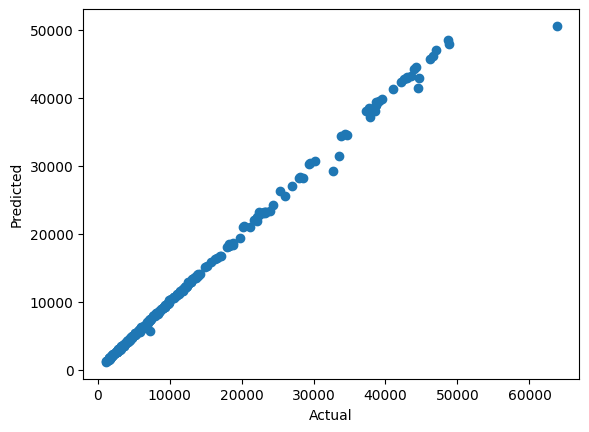

In [97]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

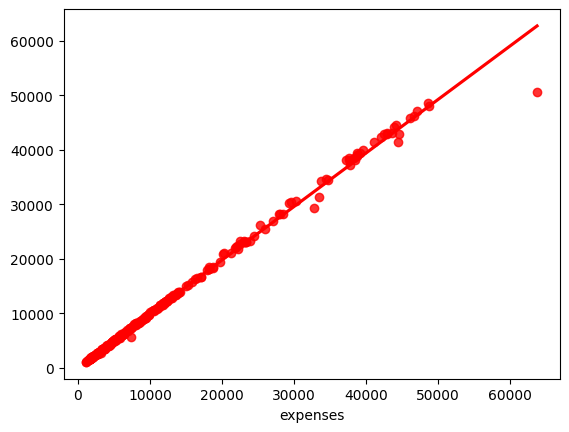

In [98]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [99]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
764,9095.07,9062.779848,32.290152
887,5272.18,5287.646106,-15.466106
890,29330.98,30300.138127,-969.158127
1293,9301.89,9184.171816,117.718184
259,33750.29,34349.216584,-598.926584
...,...,...,...
109,47055.53,47024.705728,30.824272
575,12222.90,12205.834957,17.065043
535,6067.13,6119.181003,-52.051003
543,63770.43,50612.665092,13157.764908
